## 장르 탐색
### 수행단계
- 사용자 탐색
    - 사용자별로 몇 편의 영화에 평점을 부여했는지 분포를 확인하라. (Histogram)
    - 사용자의 활동 패턴(예: 활동 기간, 평점 주기 패턴)을 탐색하라. (Line chart)
    - 사용자의 선호 장르를 파악할 수 있게 시각화하라. (Heatmap)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (Windows 예시: 맑은 고딕)
from matplotlib import rc
rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
movies = pd.read_csv('kmrd-small/movies.txt', sep="\t", engine='python')
users = pd.read_csv('kmrd-small/rates.csv')
genres = pd.read_csv('kmrd-small/genres.csv')

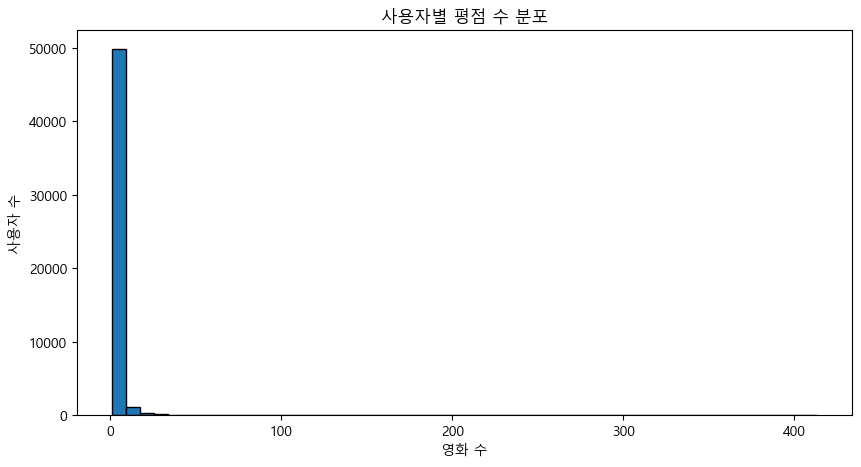

In [10]:
# 사용자별로 몇 편의 영화에 평점을 부여했는지 분포 확인 (Histogram)
user_rate_count = users.groupby('user')['rate'].count()
plt.figure(figsize=(10, 5))
plt.hist(user_rate_count, bins=50, edgecolor='black')
plt.title('사용자별 평점 수 분포')
plt.xlabel('영화 수')
plt.ylabel('사용자 수')
plt.show()

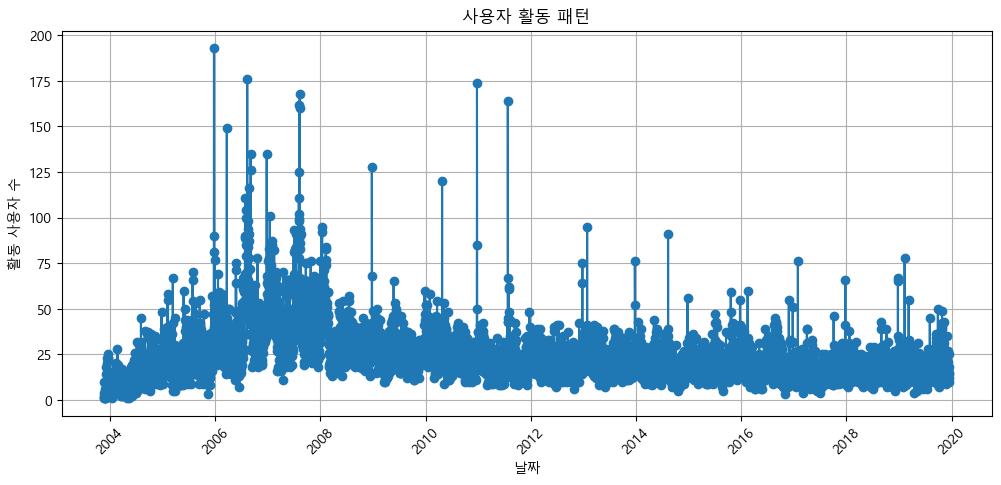

In [5]:
# 사용자 활동 패턴 탐색 (Line Chart)
users['time'] = pd.to_datetime(users['time'], unit='s')  # 타임스탬프 변환
user_activity = users.groupby(users['time'].dt.date)['user'].count()
plt.figure(figsize=(12, 5))
plt.plot(user_activity.index, user_activity.values, marker='o')
plt.title('사용자 활동 패턴')
plt.xlabel('날짜')
plt.ylabel('활동 사용자 수')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

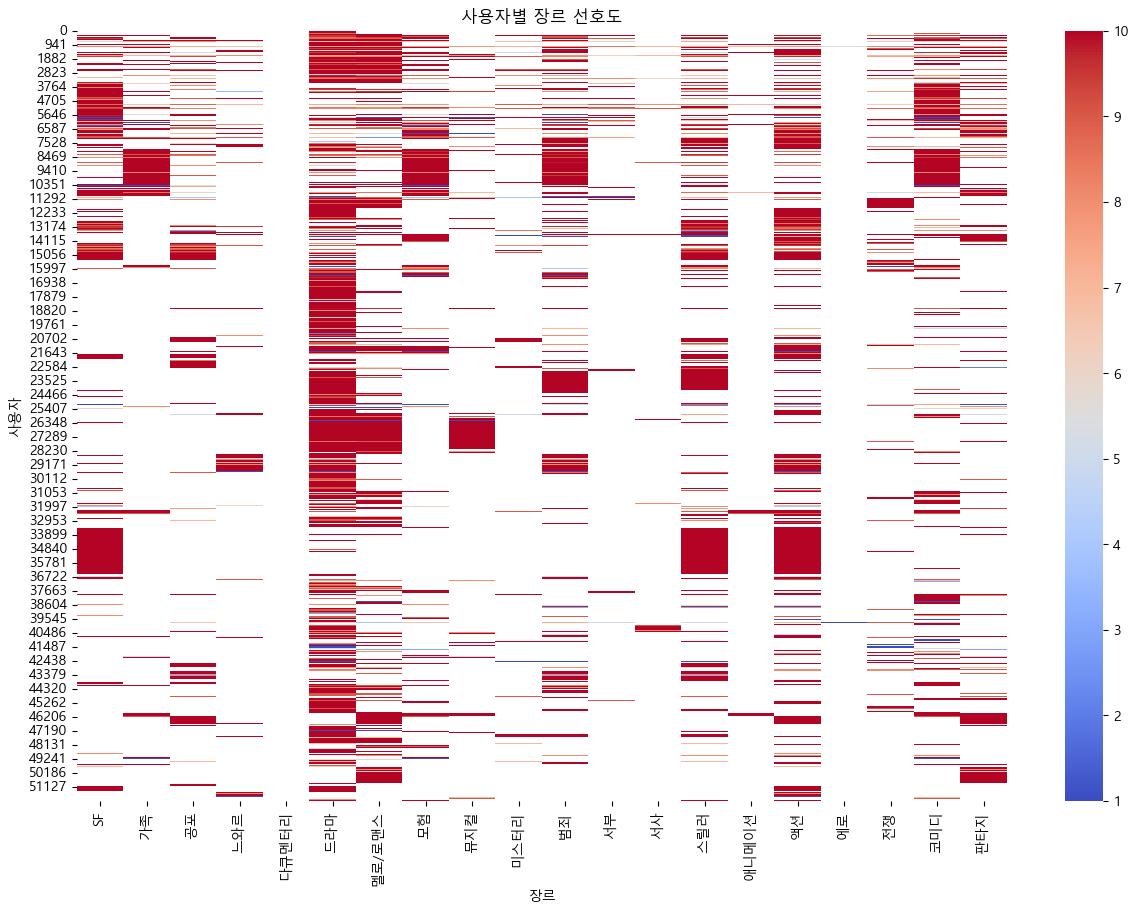

In [4]:
# 사용자의 선호 장르 탐색 (Heatmap)
user_genre = pd.merge(users, genres, on='movie')
genre_matrix = user_genre.pivot_table(index='user', columns='genre', values='rate', aggfunc='mean')
plt.figure(figsize=(15, 10))
sns.heatmap(genre_matrix, cmap='coolwarm', annot=False, cbar=True)
plt.title('사용자별 장르 선호도')
plt.xlabel('장르')
plt.ylabel('사용자')
plt.show()